# Create Image

In [1]:
import cv2 
from torchvision.datasets import MNIST
from matplotlib import pyplot as plt
import numpy as np 
import os

In [116]:
mnist = MNIST("data", train=True, download=True)

In [136]:
sample_all_class = [] 
for i in range(10):
    image = mnist.data[mnist.targets == i][2].numpy()
    sample_all_class.append(upsize_image(image,30))

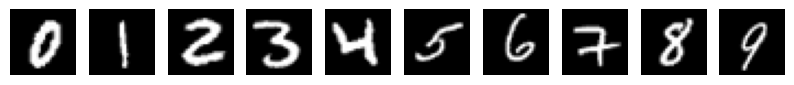

In [137]:
#plot all classes
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(sample_all_class[i], cmap="gray")
    plt.axis("off")

In [138]:
path = "../Datasets/mnist_moving"

In [146]:
#create canvas size 64 64 
frame_per_vid = 16
img_size = 30
canvas_size = 30*2
canvass = [np.zeros((canvas_size, canvas_size), dtype=np.float32) for _ in range(frame_per_vid)]
start_point = np.array([canvas_size, 0], dtype=np.int32)
end_point = np.array([img_size, canvas_size - img_size], dtype=np.int32)
# steps = np.round((end_point - start_point) / (frame_per_vid-1), 0).astype(np.int32)
steps = (end_point - start_point) / (frame_per_vid-1)

print("start_point: ", start_point, "end_point: ", end_point, "steps: ", steps)
interpolaion = np.array([start_point + steps * i for i in range(frame_per_vid)], dtype=np.int32)
interpolaion[-1] = end_point

for number, image in enumerate(sample_all_class):
    # os.makedirs(f"mnist_data/vid/{number}", exist_ok=True)
    os.makedirs(path, exist_ok=True)
    for i in range(frame_per_vid):
        canvass[i][interpolaion[i][0] - img_size:interpolaion[i][0], interpolaion[i][1]:interpolaion[i][1]+img_size] = image
        # cv2.imwrite(f"mnist_data/vid/{number}/frame_{i}.png", canvass[i])
    np_canvass = np.array(canvass)
    np.save(f"{path}/{number}",np_canvass)


# plt.figure(figsize=(20,20))
# for i in range(20):
#     plt.subplot(1,20,i+1)
#     plt.imshow(canvass[i], cmap="gray")
#     plt.axis("off")


start_point:  [60  0] end_point:  [30 30] steps:  [-2.  2.]


In [147]:
vid_9 = np.load(f"{path}/9.npy")

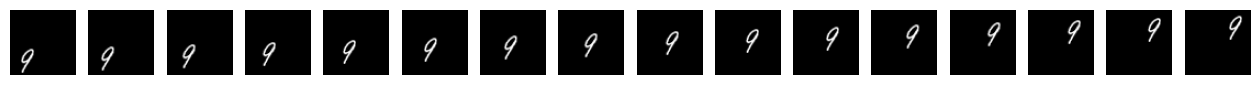

In [148]:
plt.figure(figsize=(frame_per_vid,frame_per_vid))
for i in range(frame_per_vid):
    plt.subplot(1,frame_per_vid,i+1)
    plt.imshow(vid_9[i], cmap="gray")
    plt.axis("off")

# Get Image Features

In [123]:
# from model import EncodeModel
# import torch
# import glob
# from PIL import Image
# from torchvision import transforms

In [124]:
# encode_model = EncodeModel()
# #load weights 
# encode_model.load_state_dict(torch.load("../resourses/model.pt"))

In [125]:
# class VideoDataset(torch.utils.data.Dataset):
#     def __init__(self, path, num_frames=10, transform=None):
#         self.path = path
#         if transform is None:
#             self.transform = transforms.Compose([
#                 transforms.ToTensor(),
#                 transforms.Normalize((0.1307,), (0.3081,)),          
#             ])
#         else:
#             self.transform = transform
#         self.len = len(os.listdir(path))
#         self.num_frames = num_frames
        
#     def __len__(self):
#         return self.len
    
#     def __getitem__(self, idx):
#         list_imgs = glob.glob(f"{self.path}/{idx}/*.png")
#         list_imgs.sort()
#         image = torch.FloatTensor(self.num_frames, 1, 64, 64)
#         for i in range(self.num_frames):
#             img = cv2.imread(list_imgs[i], cv2.IMREAD_GRAYSCALE)
#             img = Image.fromarray(img)
#             img = self.transform(img)
#             image[i] = img
#         return image

In [126]:
# number_dataset = VideoDataset("../data/vid")

In [127]:
# number_dataset[0].shape

In [128]:
# encode_feature = encode_model.encode(number_dataset[1][9].unsqueeze(0)).view(-1).shape

In [129]:
# features = {}
# encode_model.eval()
# # 
# for number in range(10):
#     features[number] = encode_model.encode(number_dataset[number]).view(-1, 288).detach().numpy()
    
# features[0].shape
    

In [130]:
# import pickle
# pickle.dump(features, open("../resourses/features.pkl", "wb"))

In [131]:
# plt.imshow(canvass[i], cmap="gray")